In [1]:
#Importing the necessary  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Creating a dataframe
admission_data = pd.read_csv(r'C:\Users\Jagruti\Desktop\Decision Tree + Random Forest + Ensemble Techniques\admission.csv',
                             header=0,index_col=0)

In [3]:
admission_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


# Q.1 Perform Exploratory Data Analysis (EDA) tasks

### a) Visualize the 10 random rows of the data set

In [4]:
admission_data.sample(n=10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
239,310,104,3,2.0,3.5,8.37,0,0.70
27,322,109,5,4.5,3.5,8.80,0,0.76
469,323,110,4,4.0,5.0,8.88,1,0.81
463,307,105,4,3.0,3.0,7.94,0,0.62
269,327,113,4,4.5,5.0,9.14,0,0.83
133,309,105,5,3.5,3.5,8.56,0,0.71
65,325,111,3,3.0,3.5,8.70,0,0.52
88,317,107,2,3.5,3.0,8.28,0,0.66
300,305,112,3,3.0,3.5,8.65,0,0.71


### b) Generate the description for numeric variables

In [5]:
admission_data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
admission_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


In [7]:
admission_data.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

### c) Check the shape of the data set

In [8]:
admission_data.shape

(500, 8)

There are total 500 rows & 8 columns in our data.

In [9]:
admission_data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
#To check if there are any special characters in place of values 
for i in admission_data.columns:
    print({i:admission_data[i].unique()})

{'GRE Score': array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310,
       300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315,
       301, 296, 294, 306, 305, 290, 335, 333, 297, 293], dtype=int64)}
{'TOEFL Score': array([118, 107, 104, 110, 103, 115, 109, 101, 102, 108, 106, 111, 112,
       105, 114, 116, 119, 120,  98,  93,  99,  97, 117, 113, 100,  95,
        96,  94,  92], dtype=int64)}
{'University Rating': array([4, 3, 2, 5, 1], dtype=int64)}
{'SOP': array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])}
{'LOR ': array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])}
{'CGPA': array([9.65, 8.87, 8.  , 8.67, 8.21, 9.34, 8.2 , 7.9 , 8.6 , 8.4 , 9.  ,
       9.1 , 8.3 , 8.7 , 8.8 , 8.5 , 9.5 , 9.7 , 9.8 , 9.6 , 7.5 , 7.2 ,
       7.3 , 8.1 , 9.4 , 9.2 , 7.8 , 7.7 , 9.3 , 8.85, 7.4 , 7.6 , 6.8 ,
       8.92, 9.02, 8.64, 9.22, 9.16, 9.64, 9.76, 9.45, 9.04, 8.9 , 8.56,
       8.72, 8.2

There are no missing or unique values present in our data. We can consider it as clean data

### d) Generate the correlation matrix

In [11]:
corr_df = admission_data.corr(method='pearson')
print(corr_df)


                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.827200           0.635376  0.613498   
TOEFL Score         0.827200     1.000000           0.649799  0.644410   
University Rating   0.635376     0.649799           1.000000  0.728024   
SOP                 0.613498     0.644410           0.728024  1.000000   
LOR                 0.524679     0.541563           0.608651  0.663707   
CGPA                0.825878     0.810574           0.705254  0.712154   
Research            0.563398     0.467012           0.427047  0.408116   
Chance of Admit     0.810351     0.792228           0.690132  0.684137   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.524679  0.825878  0.563398          0.810351  
TOEFL Score        0.541563  0.810574  0.467012          0.792228  
University Rating  0.608651  0.705254  0.427047          0.690132  
SOP                0.663707  0.712154  0.408116          0.68

<AxesSubplot:>

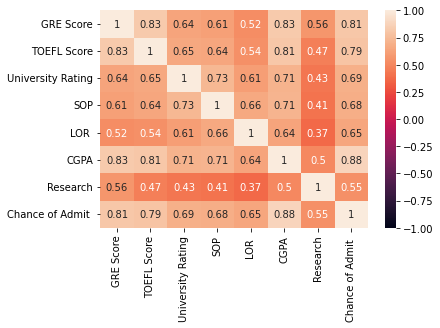

In [12]:
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

From the above observations it was noticed that GRE & CGPA were having a high relation with chance of admission as compared to other variables.

### e) Generate a correlogram

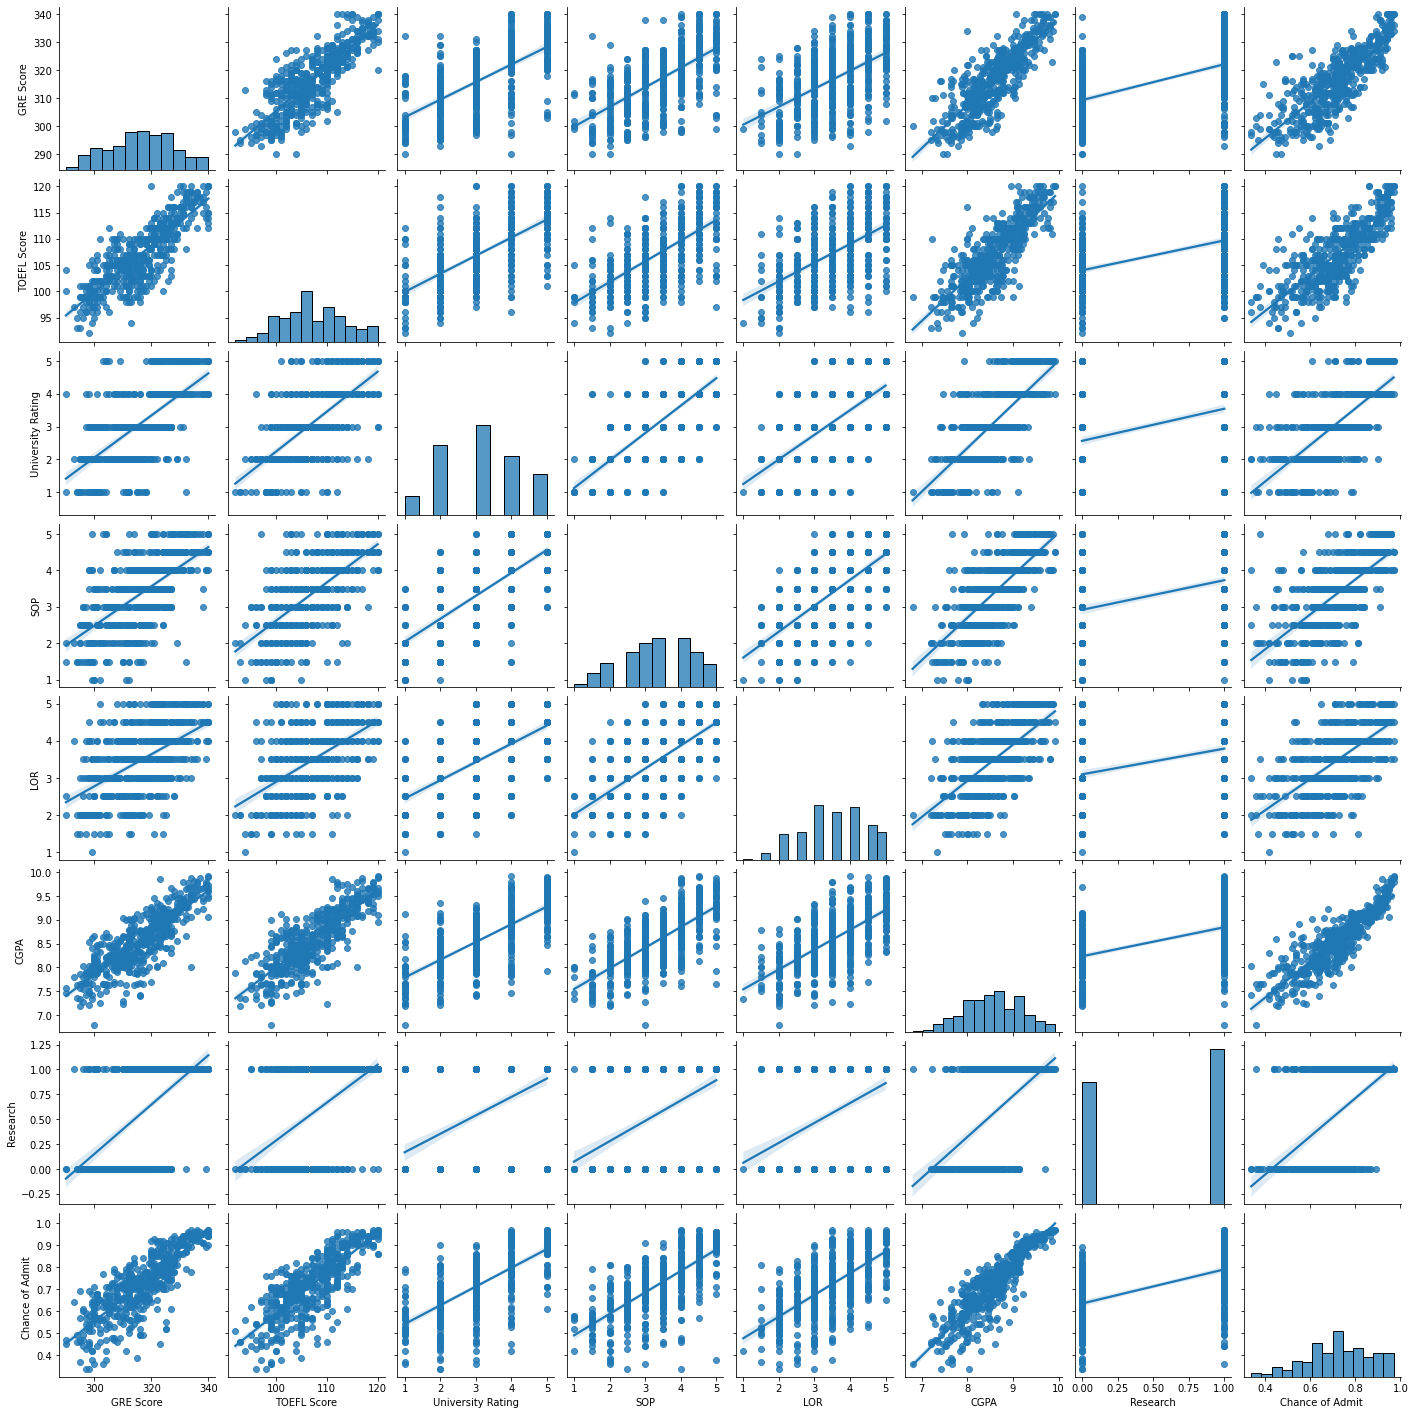

In [13]:

#Basic Correlogram
sns.pairplot(admission_data,kind="reg")
plt.show()

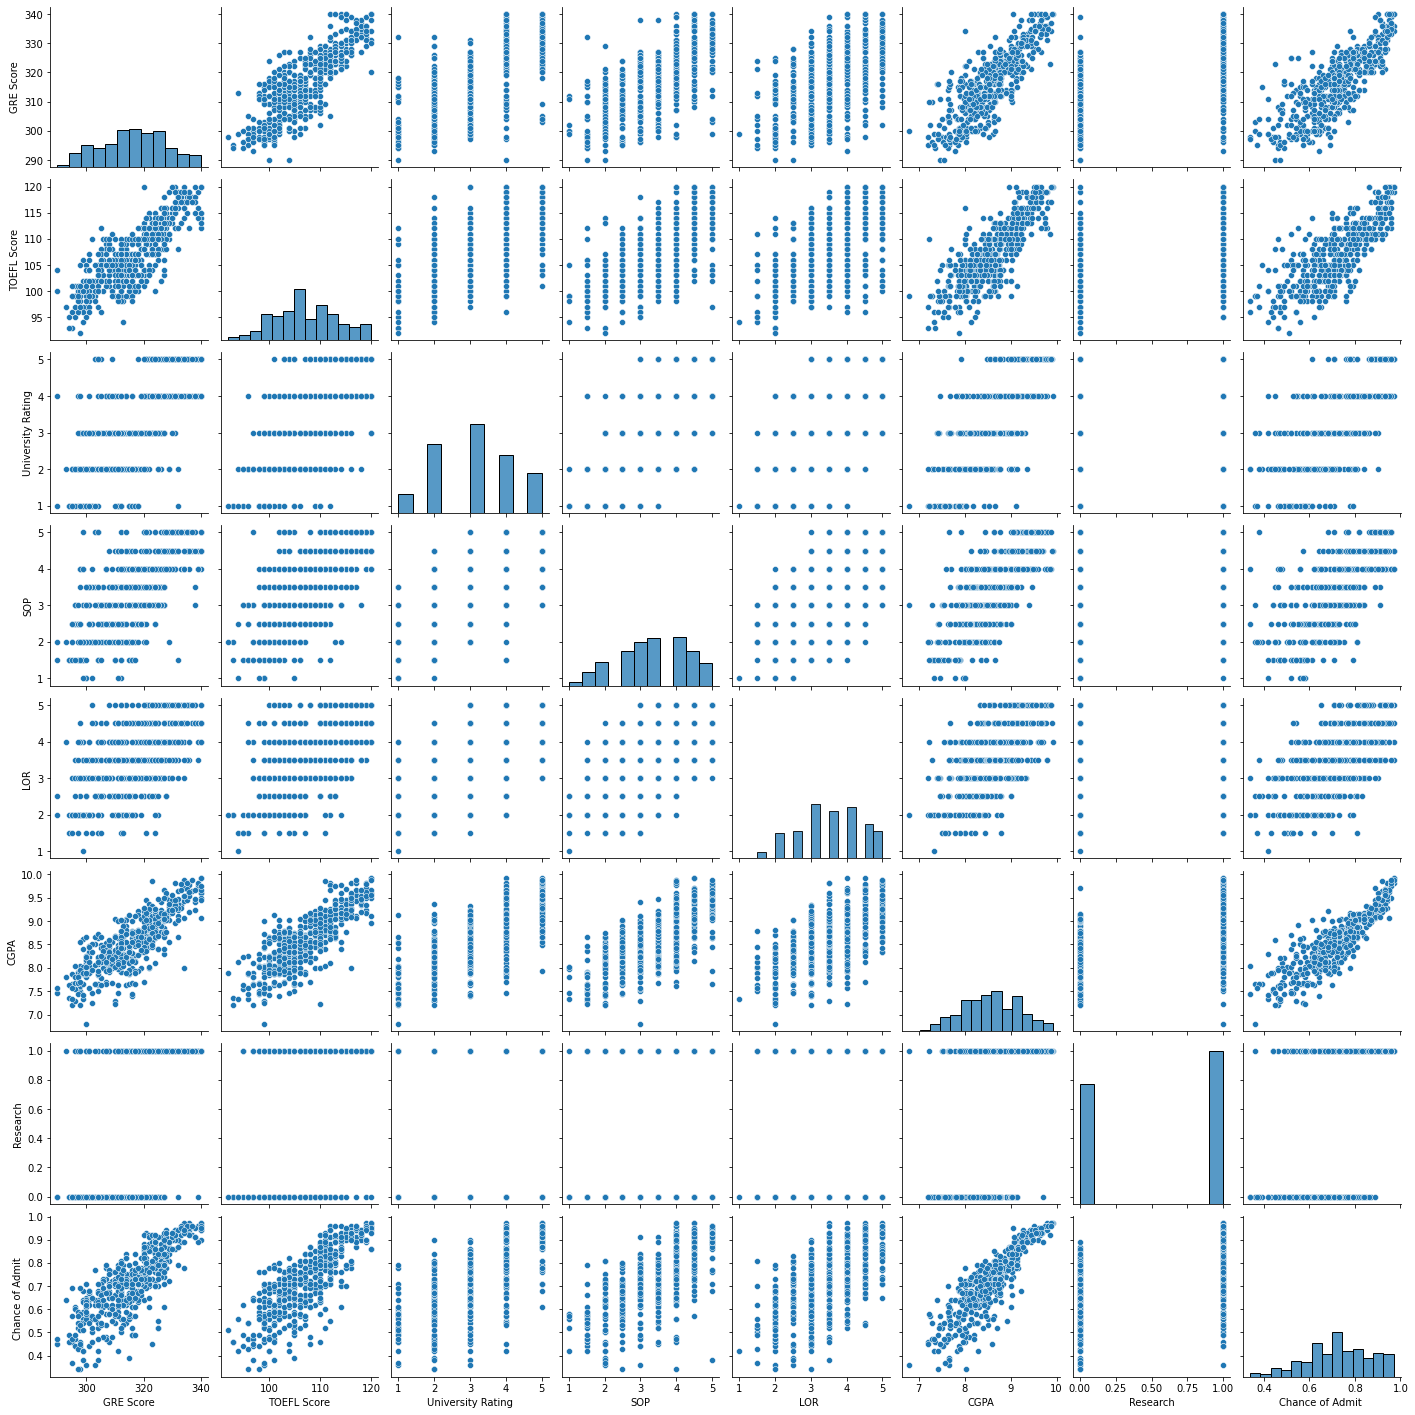

In [14]:
sns.pairplot(admission_data,kind="scatter")
plt.show()

# Q.2 Find out the minimum and maximum values for GRE score


In [15]:
print('THE Minimum value for GRE Score=',admission_data['GRE Score'].min())

THE Minimum value for GRE Score= 290


In [16]:
print('THE Maximum value for GRE Score = ',admission_data['GRE Score'].max())

THE Maximum value for GRE Score =  340


# Q.3 Find out the percentage of universities for each university rating

In [17]:
count = admission_data['University Rating'].value_counts()
              
percent = admission_data['University Rating'].value_counts(normalize=True)
              
percent_100 = admission_data['University Rating'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
                  
x = pd.DataFrame({'counts': count, 'per': percent, 'per100': percent_100})
sorted_x=x.sort_index()
sorted_x

,counts,per,per100
1,34,0.068,6.8%
2,126,0.252,25.2%
3,162,0.324,32.4%
4,105,0.210,21.0%
5,73,0.146,14.6%


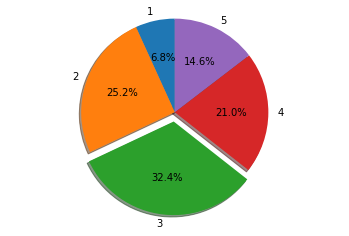

In [18]:
ratings = [1,2,3,4,5]
sizes = [6.8,25.2,32.4,21.0,14.6]
explode = (0,0,0.1,0,0)

fig1,ax1 = plt.subplots()
ax1.pie(sizes, explode = explode,labels = ratings,autopct = '%1.1f%%',
       shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

# Q.4 Convert the target variable “Chance of Admit” to categorical having values 0 and 1


#### Students having the “Chance of Admit” value > 0.80, are assigned value 1, and Students having the “Chance of Admit” value < 0.80, are assigned value 0 Where 0: Low chance of Admission and 1: High chance of admission


In [19]:
admission_data['Admit'] =  np.where(admission_data['Chance of Admit '] > 0.8,1,0)

In [20]:
admission_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit
Serial No.,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,1
2,324,107,4,4.0,4.5,8.87,1,0.76,0
3,316,104,3,3.0,3.5,8.00,1,0.72,0
4,322,110,3,3.5,2.5,8.67,1,0.80,0
5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [21]:
admission_data.drop('Chance of Admit ',axis=1,inplace=True)

In [22]:
admission_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,1
2,324,107,4,4.0,4.5,8.87,1,0
3,316,104,3,3.0,3.5,8.00,1,0
4,322,110,3,3.5,2.5,8.67,1,0
5,314,103,2,2.0,3.0,8.21,0,0


## Creating X & Y

In [23]:
X = admission_data.values[:,0:-1]
Y = admission_data.values[:,-1]

In [24]:
print(X.shape)
print(Y.shape)

(500, 7)
(500,)


## Scaling the data

As there are different feature variables in X, it can have a possibility of giving more importance to the variables having greater range and give less important to variables having small range which is not suitable.
So to overcome this problem scaling is done on the all variables in X, as it will bring all the variables in a same range

In [25]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

## Train-Test Split 

In [26]:
from sklearn.model_selection import train_test_split  #<1000=in range of 80-20  &  >1000=in range of 70-30

#Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [27]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(400, 7)
(400,)
(100, 7)
(100,)


# Q.5 Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model.

In [28]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion="gini",random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)

Y_pred = model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

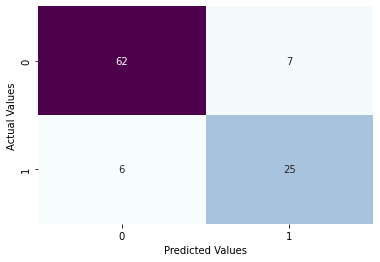

Classification report:
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.91        69
         1.0       0.78      0.81      0.79        31

    accuracy                           0.87       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.87      0.87      0.87       100

Accuracy of the model:  0.87


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [30]:
model_DecisionTree.score(X_train,Y_train)

1.0

In [31]:
print(list(zip(admission_data.columns[0:-1],model_DecisionTree.feature_importances_)))

[('GRE Score', 0.0606787087836416), ('TOEFL Score', 0.04808641486842179), ('University Rating', 0.023443960956682303), ('SOP', 0.016744376605968305), ('LOR ', 0.04275216000749721), ('CGPA', 0.7860717006203553), ('Research', 0.02222267815743356)]


In [32]:
from sklearn import tree
with open(r"model_DecisionTree.txt", "w") as f:
    
    f = tree.export_graphviz(model_DecisionTree, feature_names=admission_data.columns[0:-1],
                             out_file=f)
    
#generate the file and upload the code in webgraphviz.com to plot the decision tree

In [33]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion="gini",random_state=10,
                                           splitter="best",min_samples_leaf=5,
                                           max_depth=10,max_leaf_nodes=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)

Y_pred = model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

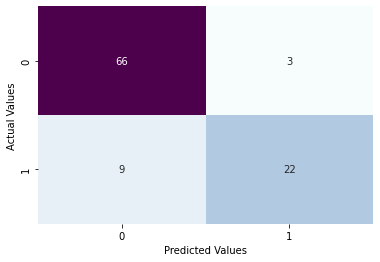

Classification report:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92        69
         1.0       0.88      0.71      0.79        31

    accuracy                           0.88       100
   macro avg       0.88      0.83      0.85       100
weighted avg       0.88      0.88      0.88       100

Accuracy of the model:  0.88


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

From the above observations it was seen that the base model was giving the accuracy of 87% whereas the tuned model was giving the accuracy of 88%.     
But the recall value was seemed to be decreasing after the model got tuned.  
Type II error was seemed to be increased in the tuned model i.e. the student who were having the chance was admission were misclassified as having less chance  for admission, as compared to that of the base model.  
So, the base model was seemed to be working better as compared to the tuned model.

# Q.6 Build a Random Forest classifier, to predict whether a student has a low or high chance of admission to a chosen university.

In [35]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest = RandomForestClassifier(n_estimators=100,random_state=10)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred = model_RandomForest.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

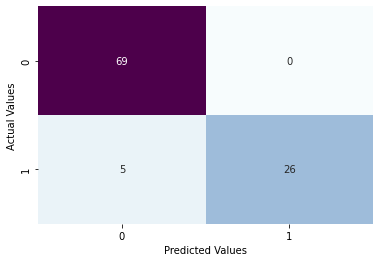

Classification report:
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        69
         1.0       1.00      0.84      0.91        31

    accuracy                           0.95       100
   macro avg       0.97      0.92      0.94       100
weighted avg       0.95      0.95      0.95       100

Accuracy of the model:  0.95


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

# Q.7 Also use Ensemble Modelling techniques, to predict whether a student has a low or high chance of admission to a chosen university.

## Extra Trees Classifier

In [37]:
#predicting using the Extra_Trees_Classifier
from sklearn.ensemble import ExtraTreesClassifier

model_ExtraTrees = ExtraTreesClassifier(n_estimators=50,random_state=10)

#fit the model on the data and predict the values
model_ExtraTrees.fit(X_train,Y_train)

Y_pred = model_ExtraTrees.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

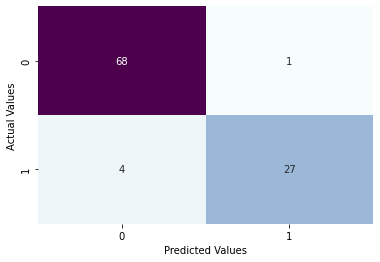

Classification report:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        69
         1.0       0.96      0.87      0.92        31

    accuracy                           0.95       100
   macro avg       0.95      0.93      0.94       100
weighted avg       0.95      0.95      0.95       100

Accuracy of the model:  0.95


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

## AdaBoost Classifier

In [39]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost=AdaBoostClassifier(base_estimator=
                                  DecisionTreeClassifier(random_state=10),
                                  n_estimators=100,
                              random_state=10)

#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)

Y_pred=model_AdaBoost.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

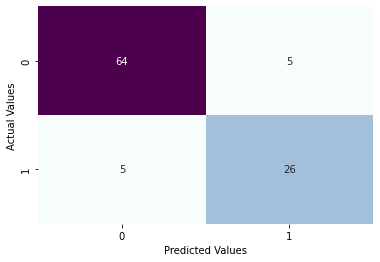

Classification report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        69
         1.0       0.84      0.84      0.84        31

    accuracy                           0.90       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.90      0.90      0.90       100

Accuracy of the model:  0.9


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

## GradientBoosting

In [41]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import GradientBoostingClassifier
model_GradientBoosting=GradientBoostingClassifier(n_estimators=300,
                              random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

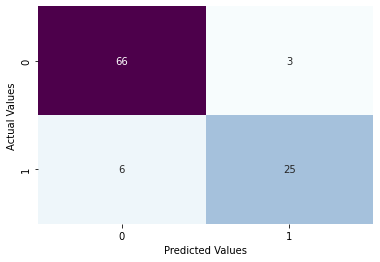

Classification report:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        69
         1.0       0.89      0.81      0.85        31

    accuracy                           0.91       100
   macro avg       0.90      0.88      0.89       100
weighted avg       0.91      0.91      0.91       100

Accuracy of the model:  0.91


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

## XGBoost 

In [43]:
from xgboost import XGBClassifier
model_XGBoost=XGBClassifier(n_estimators=100,
                              random_state=10)

#fit the model on the data and predict the values
model_XGBoost.fit(X_train,Y_train)

Y_pred=model_XGBoost.predict(X_test)

[06:22:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


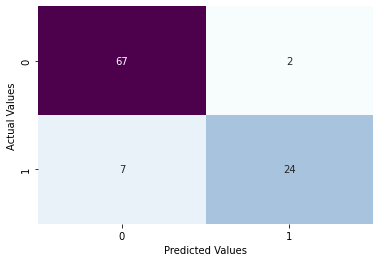

Classification report:
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94        69
         1.0       0.92      0.77      0.84        31

    accuracy                           0.91       100
   macro avg       0.91      0.87      0.89       100
weighted avg       0.91      0.91      0.91       100

Accuracy of the model:  0.91


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

# Q.8 Compare all of the models and justify your choice about the optimum model.

From all the models we tried ,Random Forest Classifier worked comparatively good as compared to that of the other models,because-  
1. It showed less no. of Type II error as compared to other models.
2. Recall values were Quite Good compared to other models.
3. Class "0" i.e. students having less chance of admission were compared correctly & only 5 from class "1" were misclassified into Type II.
4. Accuracy score was also good.